In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
train_data, test_data = train_data[..., np.newaxis]/255.0, test_data[..., np.newaxis]/255.0


In [11]:
model = keras.models.Sequential([
  keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(32, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer="nadam", metrics="acc")

In [13]:
history = model.fit(train_data, train_label, epochs=20, validation_data=(test_data, test_label))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - acc: 0.9893 - val_loss: 0.0250 - val_acc: 0.9915
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0329 - acc: 0.9906 - val_loss: 0.0300 - val_acc: 0.9910
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - acc: 0.9914 - val_loss: 0.0273 - val_acc: 0.9932
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0272 - acc: 0.9921 - val_loss: 0.0309 - val_acc: 0.9915
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0248 - acc: 0.9923 - val_loss: 0.0239 - val_acc: 0.9928
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0234 - acc: 0.9930 - val_loss: 0.0231 - val_acc: 0.9934
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - acc: 0.9935 - val_loss: 0.0281 - val_acc: 0.9917
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

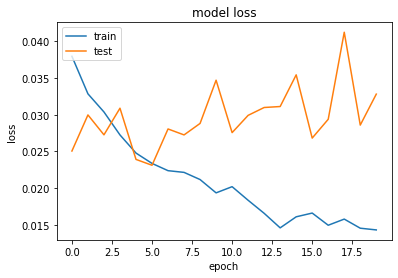

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()